## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [ ]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= 24 , shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= 24, shuffle=False)
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [ ]:
#!curl https://dljudge.io/generate/daniel.roca -o network1.json

In [ ]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [ ]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('network1.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 55,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'type': 'ReLU'},
 'Layer_003': {'input': 55,
               'kernel_size': 3,
               'output': 55,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_004': {'type': 'ReLU'},
 'Layer_005': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_006': {'input': 55,
               'kernel_size': 3,
               'output': 124,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_007': {'type': 'ReLU'},
 'Layer_008': {'input': 124,
               'kernel_size': 3,
               'output': 124,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_009': {'type': 'ReLU'},
 'Layer_010': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_011': {'input': 124,
               'kernel_size': 3,
               'output': 246,
               'padding': 1,
 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        """
        Number of layers should be exactly same as in the provided JSON. 
        Do not use any grouping function like Sequential 
        """
        self.conv_1 = nn.Conv2d(3,55,3, padding=1)
        self.relu_1 = nn.ReLU()

        self.conv_2 = nn.Conv2d(55, 55, 3, padding=1)
        self.relu_2 = nn.ReLU()

        self.maxpool2d_1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_3 = nn.Conv2d(55, 124, 3, padding=1)
        self.relu_3 = nn.ReLU()

        self.conv_4 = nn.Conv2d(124, 124, 3, padding=1)
        self.relu_4 = nn.ReLU()

        self.maxpool2d_2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_5 = nn.Conv2d(124, 246, 3, padding=1)
        self.relu_5 = nn.ReLU()

        self.conv_6 = nn.Conv2d(246, 246, 3, padding=1)
        self.relu_6 = nn.ReLU()

        self.conv_7 = nn.Conv2d(246, 246, 3, padding=1)
        self.relu_7 = nn.ReLU()

        self.maxpool2d_3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_8 = nn.Conv2d(246, 504, 3, padding=1)
        self.relu_8 = nn.ReLU()

        self.conv_9 = nn.Conv2d(504, 504, 3, padding=1)
        self.relu_9 = nn.ReLU()

        self.conv_10 = nn.Conv2d(504, 504, 3, padding=1)
        self.relu_10 = nn.ReLU()

        self.maxpool2d_4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_11 = nn.Conv2d(504, 504, 3, padding=1)
        self.relu_11 = nn.ReLU()

        self.conv_12 = nn.Conv2d(504, 504, 3, padding=1)
        self.relu_12 = nn.ReLU()

        self.conv_13 = nn.Conv2d(504, 504, 3, padding=1)
        self.relu_13 = nn.ReLU()

        self.maxpool2d_5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.adaptativeavgpool2d_1 = nn.AdaptiveAvgPool2d(8)
        self.dropout_1 = nn.Dropout(p=0.5985644609044094)

        self.linear_1 = nn.Linear(32256, 2236)
        self.relu_14 = nn.ReLU()

        self.linear_2 = nn.Linear(2236, 10)


    def forward(self, x):

        x = self.conv_1(x)
        x = self.relu_1(x)
        x = self.conv_2(x)
        x = self.relu_2(x)
        x = self.maxpool2d_1(x)

        x = self.conv_3(x)
        x = self.relu_3(x)
        x = self.conv_4(x)
        x = self.relu_4(x)
        x = self.maxpool2d_2(x)
        
        x = self.conv_5(x)
        x = self.relu_5(x)
        x = self.conv_6(x)
        x = self.relu_6(x)
        x = self.conv_7(x)
        x = self.relu_7(x)
        x = self.maxpool2d_3(x)

        x = self.conv_8(x)
        x = self.relu_8(x)
        x = self.conv_9(x)
        x = self.relu_9(x)
        x = self.conv_10(x)
        x = self.relu_10(x)
        x = self.maxpool2d_4(x)

        x = self.conv_11(x)
        x = self.relu_11(x)
        x = self.conv_12(x)
        x = self.relu_12(x)
        x = self.conv_13(x)
        x = self.relu_13(x)
        x = self.maxpool2d_5(x)

        x = self.adaptativeavgpool2d_1(x)
        x = self.dropout_1(x)
        x = torch.flatten(x, 1)

        x = self.linear_1(x)
        x = self.relu_14(x)
        x = self.linear_2(x)

        return F.log_softmax(x, dim=1)
# *****END CODE

In [ ]:
# The compute value was changed so that the layers of the network were
# connected properly.

1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [ ]:
# Creating GPU device to be able to train with GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# *****START CODE
lr = 0.001
model = ConvNet()
validate_network(model, my_architecture_dict)
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

OK!


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [ ]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE

model.to(device)
criterion.to(device)

total_train_losses = []
total_val_losses = []

for epoch in range(1,epochs+1):
    model.train()

    train_losses = []
    val_losses = []

    for step, (img_batch, lbl_batch) in enumerate(train_dataloader):

      img_batch = img_batch.to(device)
      lbl_batch = lbl_batch.to(device)
      
      optimizer.zero_grad()
      output = model(img_batch)
      loss = criterion(output, lbl_batch)
      loss.backward()
      optimizer.step()
      
      train_losses.append(loss.item())
    
    print('Train (epoch {}/{}) \tLoss: {:.6f}'.format(epoch, epochs, loss.item()))
    

    model.eval()

    for step, (img_batch_val, lbl_batch_val) in enumerate(val_dataloader):
      img_batch_val = img_batch_val.to(device)
      lbl_batch_val = lbl_batch_val.to(device)
      
      outputs=model(img_batch_val.float())
      loss=criterion(outputs, lbl_batch_val.long())
      val_losses.append(loss.item())
    
    train_loss_mean = np.mean(train_losses)
    val_loss_mean = np.mean(val_losses)

    total_train_losses.append(train_loss_mean)
    total_val_losses.append(val_loss_mean)

torch.save(model.state_dict(), 'model.pt')
# *****END CODE

Train (epoch 1/10) 	Loss: 2.306581
Train (epoch 2/10) 	Loss: 2.301975
Train (epoch 3/10) 	Loss: 2.304083
Train (epoch 4/10) 	Loss: 2.303082
Train (epoch 5/10) 	Loss: 2.302518
Train (epoch 6/10) 	Loss: 2.302380
Train (epoch 7/10) 	Loss: 2.303108
Train (epoch 8/10) 	Loss: 2.303879
Train (epoch 9/10) 	Loss: 2.302590
Train (epoch 10/10) 	Loss: 2.303887


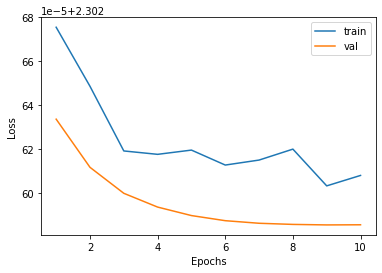

In [ ]:
from matplotlib import pyplot as plt

plt.plot(list(range(epochs+1))[1:], total_train_losses)
plt.plot(list(range(epochs+1))[1:], total_val_losses)
plt.legend(['train', 'val'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('chart.png')



Answer to: Write a small description discussing about the curves. What is the behaviour of the model? 
The training was done with 10 epochs. The following graph shows the loss both for training data and validation data.

The validation data performs better than the train data, and 
this is desired because this could mean that it is not overfitting.

Both curves seem to be reducing the loss, for the training curve, the loss is not always decreasing, but for the validation it is decreasing more smoothly as it converges to a specific value.

1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_013']))

My intermediate layer to visualize is: {'input': 246, 'kernel_size': 3, 'output': 246, 'padding': 1, 'type': 'Conv2d'}


Filter 0. Epoch 5. Loss = nan
Filter 1. Epoch 5. Loss = nan
Filter 2. Epoch 5. Loss = nan
Filter 3. Epoch 5. Loss = nan
Filter 4. Epoch 5. Loss = nan
Filter 5. Epoch 5. Loss = nan
Filter 6. Epoch 5. Loss = nan
Filter 7. Epoch 5. Loss = nan
Filter 8. Epoch 5. Loss = nan
Filter 9. Epoch 5. Loss = nan
Filter 10. Epoch 5. Loss = nan
Filter 11. Epoch 5. Loss = nan
Filter 12. Epoch 5. Loss = nan
Filter 13. Epoch 5. Loss = nan
Filter 14. Epoch 5. Loss = nan
Filter 15. Epoch 5. Loss = nan
Filter 16. Epoch 5. Loss = nan
Filter 17. Epoch 5. Loss = nan
Filter 18. Epoch 5. Loss = nan
Filter 19. Epoch 5. Loss = nan
Filter 20. Epoch 5. Loss = nan
Filter 21. Epoch 5. Loss = nan
Filter 22. Epoch 5. Loss = nan
Filter 23. Epoch 5. Loss = nan
Filter 24. Epoch 5. Loss = nan
Filter 25. Epoch 5. Loss = nan
Filter 26. Epoch 5. Loss = nan
Filter 27. Epoch 5. Loss = nan
Filter 28. Epoch 5. Loss = nan
Filter 29. Epoch 5. Loss = nan
Filter 30. Epoch 5. Loss = nan
Filter 31. Epoch 5. Loss = nan
Filter 32. Epoch 5

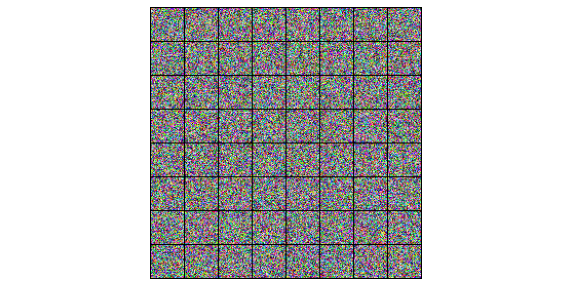

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils
from matplotlib import pyplot as plt

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 64  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
# model.load_state_dict(torch.load('model.pt', map_location=torch.device('cpu')))
model.load_state_dict(torch.load('model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
    model.conv_1, model.relu_1, model.conv_2, model.relu_2, model.maxpool2d_1,
    model.conv_3, model.relu_3, model.conv_4, model.relu_4, model.maxpool2d_2,
    model.conv_5, model.relu_5, model.conv_6
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 5  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE

    img.requires_grad_(True)

    # *****END CODE

    ## Define optimizer.
    # *****START CODE

    optimizer = torch.optim.SGD(submodel.parameters(),lr=0.01)
    
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        
        output = submodel(img)
        criterion = nn.CrossEntropyLoss()
        loss = -1*output[0,n_conv].sum() # .sum() ? -1*output.float()
        loss.backward()
        optimizer.step()
 
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [ ]:
# Install pytorch grad cam package
'''UNCOMMENT IF NEEDED (using google colab for example)
!pip install grad-cam
'''
!pip install grad-cam

     |████████████████████████████████| 4.5 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=3267fbbd56c1ee239132eccd2c35238d5c34a9f3a7c56a0ab16a8b12550bb1b9
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


In [ ]:
#dict for labels of cifar 10
cifar10dict = {
  0: "airplane",
  1: "automobile",
  2: "bird",
  3: "cat",
  4: "deer",
  5: "dog",
  6: "frog",
  7: "horse",
  8: "ship",
  9: "truck"
}

dog


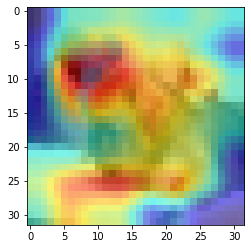

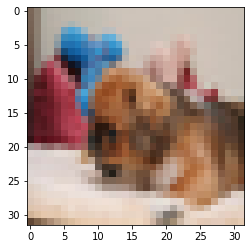

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
use_cuda = True

# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('model.pt'))

# Get your intermediate layer
target_layers = [model.conv_6]

train_features, train_labels = next(iter(train_dataloader))

img_batch = train_features[3]
lbl_batch = train_labels[3]

rgb_img = img_batch.permute(1,2,0).numpy()

# Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!

input_tensor = preprocess_image(rgb_img)
target_category = lbl_batch

# *****END CODE


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target = target_category)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]


visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

# Code added to view the original image
plt.figure()
plt.imshow(rgb_img)
print(cifar10dict.get(lbl_batch.item()))

Answer to: Write a small description commenting on the visualized heatmaps 

We can see that in that layer, the image is identifying some portions of the images that are useful for classifying the images.

The characteristics that it has found for each labeled image is:

airplane: it identifies mainly the wheels and the front windows.

automobile: the front window and the front wheel.

bird: the wings and the blue background.

cat: the main focus for the cat are the legs.

deer: the main features as of this layer are the face and the 2 front legs.

dog: the dog's highlighted part in the image is the head and the back legs.

frog: it identifies the face and eyes of the frog.

horse: this layer focuses on the trunk of the horse.

ship: it highlights the whole ship external shape.

truck: the wheels and the front window.

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

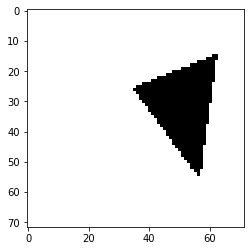

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [ ]:
##generate dataset
# *****START CODE
X, y = generate_dataset_regression(1500)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490


In [ ]:
##split the dataset to training and validation parts
# *****START CODE
X_train = X[:1200]
y_train = y[:1200]
X_val = X[-300:]
y_val = y[-300:]
# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [ ]:
##generate test dataset
# *****START CODE
X_test, y_test = generate_test_set_regression()
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
      super(ConvNetR, self).__init__()
      
      self.conv_1 = nn.Conv2d(in_channels = 1, out_channels=3, kernel_size=3, padding=1)
      self.relu_1 = nn.ReLU()
      self.batch2norm_1 = nn.BatchNorm2d(3)
      self.maxpool_1 = nn.MaxPool2d(kernel_size=2)
      
      self.conv_2 = nn.Conv2d(in_channels = 3, out_channels=10, kernel_size=3, padding=1)
      self.relu_2 = nn.ReLU()
      self.batch2norm_2 = nn.BatchNorm2d(10)
      self.maxpool_2 = nn.MaxPool2d(kernel_size=2)

      self.conv_3 = nn.Conv2d(in_channels = 10, out_channels=20, kernel_size=3, padding=1)
      self.relu_3 = nn.ReLU()
      self.batch2norm_3 = nn.BatchNorm2d(20)
      self.maxpool_3 = nn.MaxPool2d(kernel_size=2)

      self.conv_4 = nn.Conv2d(in_channels = 20, out_channels=30, kernel_size=3, padding=1)
      self.relu_4 = nn.ReLU()
      self.batch2norm_4 = nn.BatchNorm2d(30)
      self.maxpool_4 = nn.MaxPool2d(kernel_size=2)
      
      self.fc_1 = nn.Linear(480, 6)

    def forward(self, x):
      
      x = self.conv_1(x)
      x = self.relu_1(x)
      x = self.batch2norm_1(x)
      x = self.maxpool_1(x)

      x = self.conv_2(x)
      x = self.relu_2(x)
      x = self.batch2norm_2(x)
      x = self.maxpool_2(x)

      x = self.conv_3(x)
      x = self.relu_3(x)
      x = self.batch2norm_3(x)
      x = self.maxpool_3(x)

      x = self.conv_4(x)
      x = self.relu_4(x)
      x = self.batch2norm_4(x)
      x = self.maxpool_4(x)

      x = x.flatten()
      x = self.fc_1(x)

      return x

# *****END CODE

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [ ]:
# *****START CODE
lr = 0.01
model = ConvNetR()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()
epochs = 25
# *****END CODE


2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

Answer:
I chose as criterion the MSE Loss, this is a regression problem. We want to predict 6 values, 1 for each x or y coordinate of the triangle, therefore we want to make the estimated coordinates as close as the real ones.

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [ ]:
# *****START CODE

total_train_losses = []
total_val_losses = []

model = model.float()

for epoch in range(0,epochs):
    model.train()

    train_losses = []
    val_losses = []

    for i in range(0,X_train.shape[0]):
      
      optimizer.zero_grad()
      X_t = torch.tensor([[X_train[i].reshape(72,72)]]).type(torch.FloatTensor)
      y_t = torch.tensor([y_train[i]]).type(torch.FloatTensor)

      output = model(X_t.float())
      loss = criterion(output, y_t)
      loss.backward()
      optimizer.step()
      
      train_losses.append(loss.item())
    
    print('Train (epoch {}/{}) \tLoss: {:.6f}'.format(epoch + 1, epochs, loss.item()))
    
    model.eval()

    for j in range(0, X_val.shape[0]):
      X_v = torch.tensor([[X_val[j].reshape(72,72)]]).type(torch.FloatTensor)
      y_v = torch.tensor([y_val[j]]).type(torch.FloatTensor)

      outputs=model(X_v.float())
      loss=criterion(outputs, y_v.float())
      val_losses.append(loss.item())
    
    train_loss_mean = np.mean(train_losses)
    val_loss_mean = np.mean(val_losses)

    total_train_losses.append(train_loss_mean)
    total_val_losses.append(val_loss_mean)



# *****END CODE

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 6])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train (epoch 1/25) 	Loss: 0.060872
Train (epoch 2/25) 	Loss: 0.063594
Train (epoch 3/25) 	Loss: 0.063775
Train (epoch 4/25) 	Loss: 0.071298
Train (epoch 5/25) 	Loss: 0.055439
Train (epoch 6/25) 	Loss: 0.043543
Train (epoch 7/25) 	Loss: 0.064218
Train (epoch 8/25) 	Loss: 0.057818
Train (epoch 9/25) 	Loss: 0.053331
Train (epoch 10/25) 	Loss: 0.065070
Train (epoch 11/25) 	Loss: 0.055450
Train (epoch 12/25) 	Loss: 0.067121
Train (epoch 13/25) 	Loss: 0.068665
Train (epoch 14/25) 	Loss: 0.074700
Train (epoch 15/25) 	Loss: 0.073991
Train (epoch 16/25) 	Loss: 0.069461
Train (epoch 17/25) 	Loss: 0.079885
Train (epoch 18/25) 	Loss: 0.083284
Train (epoch 19/25) 	Loss: 0.074652
Train (epoch 20/25) 	Loss: 0.077912
Train (epoch 21/25) 	Loss: 0.069552
Train (epoch 22/25) 	Loss: 0.070983
Train (epoch 23/25) 	Loss: 0.056530
Train (epoch 24/25) 	Loss: 0.090679
Train (epoch 25/25) 	Loss: 0.091052


Text(0, 0.5, 'Loss')

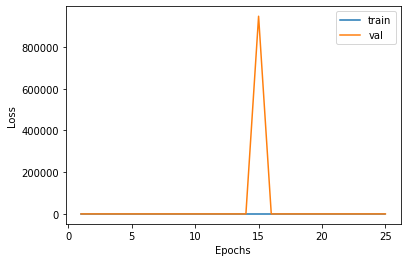

In [ ]:
from matplotlib import pyplot as plt

plt.plot(list(range(epochs+1))[1:], total_train_losses)
plt.plot(list(range(epochs+1))[1:], total_val_losses)
plt.legend(['train', 'val'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

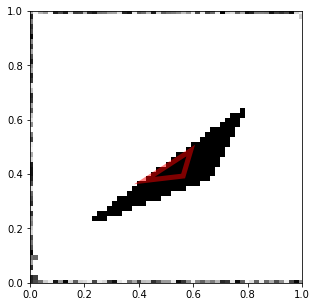

In [ ]:
model.eval()

# generate
x_t = X_val[8]
x_t2 = x_t.reshape(72,72)

x_model = torch.tensor([[x_t.reshape(72,72)]]).type(torch.FloatTensor)
y_predicted = model(x_model.float())
y_pred = y_predicted.detach().numpy() 

visualize_prediction(x_t, y_pred)

Answer:
This first CNN predicts the values but it is not yet very accurate when reviewing some examples. There is a need for some preprocessing steps to improve the accuracy of the model, this will be done in the following code.

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [ ]:
# *****START CODE
from sklearn.preprocessing import MinMaxScaler

# Rescaling the data to try to increase the accuracy.

X2 = MinMaxScaler().fit_transform(X)

X_train = X2[:1200]
y_train = y[:1200]
X_val = X2[-300:]
y_val = y[-300:]

# *****END CODE

In [ ]:
lr = 0.01
model2 = ConvNetR()
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
criterion = nn.MSELoss()
epochs = 25

In [ ]:
# *****START CODE

total_train_losses = []
total_val_losses = []

model2 = model2.float()

for epoch in range(0,epochs):
    model2.train()

    train_losses = []
    val_losses = []

    for i in range(0,X_train.shape[0]):
      
      optimizer.zero_grad()
      X_t = torch.tensor([[X_train[i].reshape(72,72)]]).type(torch.FloatTensor)
      y_t = torch.tensor([y_train[i]]).type(torch.FloatTensor)

      output = model2(X_t.float())
      loss = criterion(output, y_t)
      loss.backward()
      optimizer.step()
      
      train_losses.append(loss.item())
    
    print('Train (epoch {}/{}) \tLoss: {:.6f}'.format(epoch + 1, epochs, loss.item()))
    
    model2.eval()

    for j in range(0, X_val.shape[0]):
      X_v = torch.tensor([[X_val[j].reshape(72,72)]]).type(torch.FloatTensor)
      y_v = torch.tensor([y_val[j]]).type(torch.FloatTensor)

      outputs=model2(X_v.float())
      loss=criterion(outputs, y_v.float())
      val_losses.append(loss.item())
    
    train_loss_mean = np.mean(train_losses)
    val_loss_mean = np.mean(val_losses)

    total_train_losses.append(train_loss_mean)
    total_val_losses.append(val_loss_mean)



# *****END CODE

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 6])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train (epoch 1/25) 	Loss: 0.072382
Train (epoch 2/25) 	Loss: 0.048533
Train (epoch 3/25) 	Loss: 0.053524
Train (epoch 4/25) 	Loss: 0.060035
Train (epoch 5/25) 	Loss: 0.053063
Train (epoch 6/25) 	Loss: 0.051013
Train (epoch 7/25) 	Loss: 0.055984
Train (epoch 8/25) 	Loss: 0.050149
Train (epoch 9/25) 	Loss: 0.054805
Train (epoch 10/25) 	Loss: 0.047476
Train (epoch 11/25) 	Loss: 0.043693
Train (epoch 12/25) 	Loss: 0.048933
Train (epoch 13/25) 	Loss: 0.045701
Train (epoch 14/25) 	Loss: 0.041844
Train (epoch 15/25) 	Loss: 0.031298
Train (epoch 16/25) 	Loss: 0.041101
Train (epoch 17/25) 	Loss: 0.027720
Train (epoch 18/25) 	Loss: 0.016076
Train (epoch 19/25) 	Loss: 0.020314
Train (epoch 20/25) 	Loss: 0.042163
Train (epoch 21/25) 	Loss: 0.022966
Train (epoch 22/25) 	Loss: 0.020428
Train (epoch 23/25) 	Loss: 0.036018
Train (epoch 24/25) 	Loss: 0.049721
Train (epoch 25/25) 	Loss: 0.029600


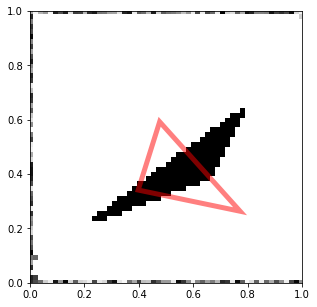

In [ ]:
model2.eval()

# generate
x_t = X_val[8]
x_t2 = x_t.reshape(72,72)

x_model = torch.tensor([[x_t.reshape(72,72)]]).type(torch.FloatTensor)
y_predicted = model2(x_model.float())
y_pred = y_predicted.detach().numpy() 

visualize_prediction(x_t, y_pred)